In [1]:
import numpy as np
from numpy import exp, sqrt, abs
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14

In [2]:
CASE=1
if CASE==0: dname="DATA"
if CASE==1: dname="DATA_b"

fname=dname+'/x_RBM_q0.1.dat'
# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible"
v = np.loadtxt(fname, delimiter=" ",dtype=int)
# store in v0, because later we will shuffle v
v0 = np.copy(v)
# to start, take a small subsample
# v = v[1:11]
N = len(v)
L = len(v[1])

SPINS = True
#SPINS = False

if SPINS:
    # sigmoid takes into account energy difference =2
    GAP=2
    # convert 0,1 -> -1,1
    v = 2*v - 1
    vmin=-1
else:
    GAP=1
    vmin=0

print(f'each of N={N} data has L={L} digits')

for i in range(min(12,N)):
    if SPINS: print(v0[i],"\n->",v[i])
    else: print(v[i])
print('...')

each of N=10000 data has L=20 digits
[0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0] 
-> [-1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1] 
-> [-1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1]
[0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1] 
-> [-1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1]
[0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0] 
-> [-1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1]
[0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0] 
-> [-1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1]
[0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0] 
-> [-1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1]
[0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0] 
-> [-1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1] 
-> [-1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1]
[1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0] 
-> [ 1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -

## initialize

In [3]:
# RBM, nr of hidden units
if CASE==0: M = 3
if CASE==1: M = 6
# range of each initial weight
sigma = sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L,M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
print("w=",w);print("a=",a);print("b=",b)
w0,a0,b0=np.copy(w),np.copy(a),np.copy(b)

w= [[-8.02929500e-02  1.87857033e-01 -2.03740626e-01 -2.17975359e-01
   7.71042577e-01  5.46538733e-01]
 [ 3.64414674e-02  1.10509933e-01  3.01635468e-01  4.88891926e-01
   3.95052168e-01 -5.08419748e-01]
 [ 1.07860593e-01  8.97870182e-02  5.30657642e-01  3.47686193e-01
  -7.85106746e-01 -1.45848643e-01]
 [ 6.54645586e-01 -1.72021203e-01 -2.11704013e-01  1.87088914e-01
   1.27434065e+00 -4.00558390e-01]
 [-2.26352263e-01  4.86843697e-02  1.18694804e-01  2.05440307e-01
   3.68807287e-04  5.27085566e-01]
 [-2.79874977e-01 -3.26005239e-01 -9.29681343e-01 -7.29850429e-01
  -3.37616829e-01  2.19707060e-01]
 [-4.96540360e-01  4.70000651e-02 -4.17143902e-01  1.30567343e-01
  -9.25440195e-01 -7.82671864e-02]
 [-6.04820407e-01 -3.80753951e-01 -5.12659443e-01  1.12315611e-01
   1.48257566e-01 -2.95698627e-01]
 [ 1.29940923e-01  5.29412453e-01  2.74078923e-02  9.67535462e-02
  -4.65250272e-03  3.94119531e-01]
 [ 5.20568556e-01 -3.60564048e-01 -6.07609535e-01  8.70151550e-03
   2.97454498e-01 -2.5

## Plotting

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1]


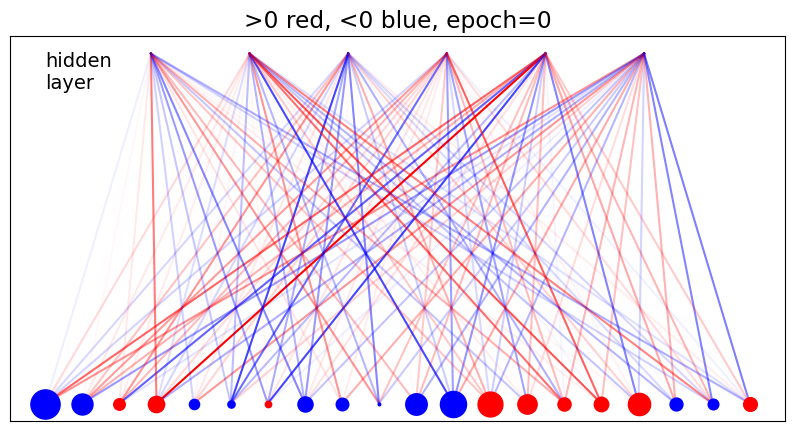

In [4]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph_vert(epoch=0):
    A=2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*abs(w[i][j]))
    # Scatter plot on top of lines
    
    A=300./(a.max()+b.max())
    
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))

    for j in range(M):
        plt.scatter(x2[j], y2[j], s=A*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")
    plt.figaspect(1)
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(10, 5))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=500.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                  
plotgraph()

In [5]:
# eq(213) page 97, activation via sigmoid
# taking into account energy gap DE=2 for "spin" variables (-1,1)
def activate(v_in,wei,bias,DE,info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1. / (1. + exp(-DE*act))
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input=', v_in)
        print('act=',act)
        print('prob=',prob)
        print('output=',v_out)
    return v_out

k = 0
activate(v[k],w,b,GAP,info=True)

input= [-1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1]
act= [-0.55363703  1.08935447  3.20797777  0.05050731 -0.65476091 -0.30478319]
prob= [0.24837944 0.89832121 0.99836741 0.5252322  0.21256687 0.35215812]
output= [-1  1  1  1 -1 -1]


array([-1,  1,  1,  1, -1, -1])

## RBM train


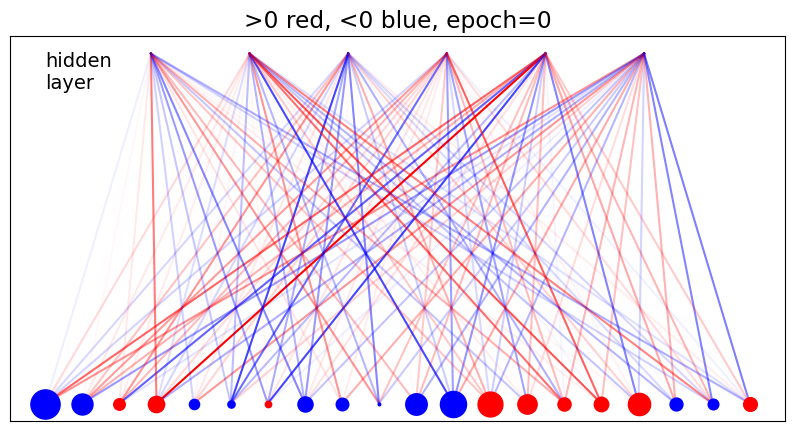

----------- epoch = 0   k= 499   m= 500
dw = [[-0.084  0.356 -0.084  0.184 -0.344  0.032]
 [-0.28  -0.216 -0.528  0.092 -0.332  0.292]
 [-0.308 -0.34  -0.532 -0.464  0.176  0.008]
 [-0.308 -0.324 -0.172 -0.312 -0.248 -0.056]
 [ 0.108 -0.068  0.044 -0.12   0.256 -0.464]
 [ 0.484  0.572  0.388  0.472  0.2   -0.56 ]
 [ 0.584  0.616 -0.312  0.532  0.548  0.148]
 [ 0.36   0.664  0.224  0.764  0.22   0.004]
 [-0.54   0.028 -0.292 -0.064 -0.12   0.112]
 [ 0.     0.12  -0.104  0.46  -0.292  0.052]
 [-0.336 -0.256 -0.096 -0.364 -0.228 -0.188]
 [ 0.344  0.52   0.32   0.492  0.164 -0.308]
 [-0.068 -0.372 -0.732 -0.392  0.392  0.024]
 [-0.084  0.044 -0.028  0.104  0.    -0.184]
 [-0.368 -0.432 -0.672 -0.252 -0.036  0.108]
 [-0.56  -0.544 -0.696 -0.404 -0.028  0.22 ]
 [ 0.068  0.18  -0.508  0.264  0.448  0.168]
 [ 0.116  0.548 -0.076  0.632  0.008 -0.048]
 [-0.208 -0.408 -0.272 -0.564 -0.196  0.188]
 [ 0.14  -0.036 -0.14  -0.008  0.08   0.216]]
da = [ 0.22  -0.272 -0.892 -0.348 -0.292 -0.268 -0.648

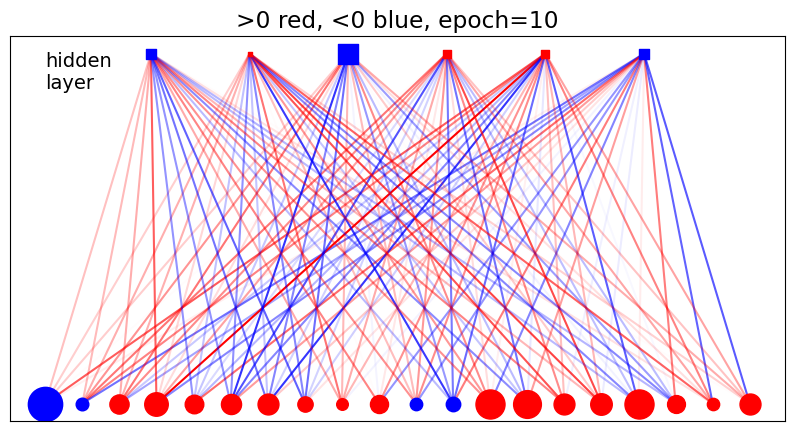

l_rate =  0.9090909090909092


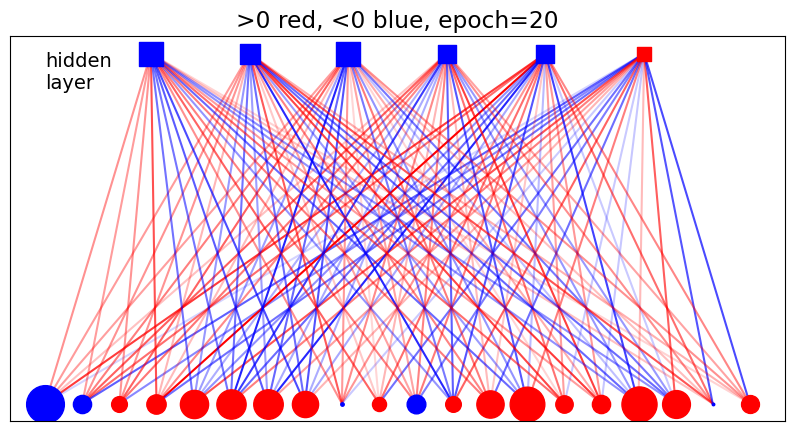

l_rate =  0.8333333333333337


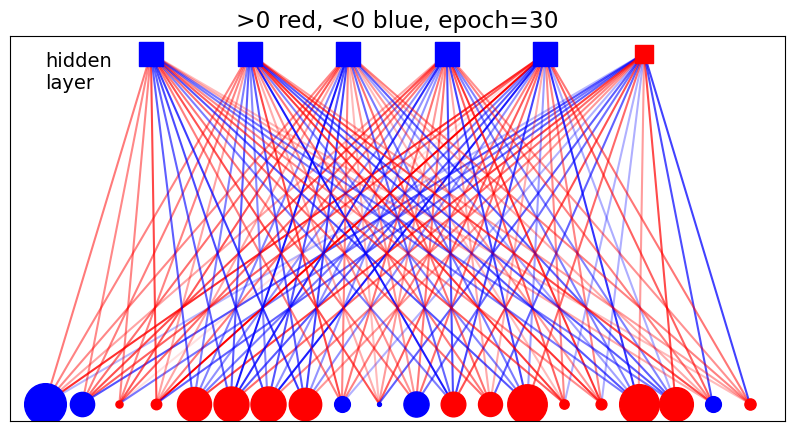

l_rate =  0.7692307692307697


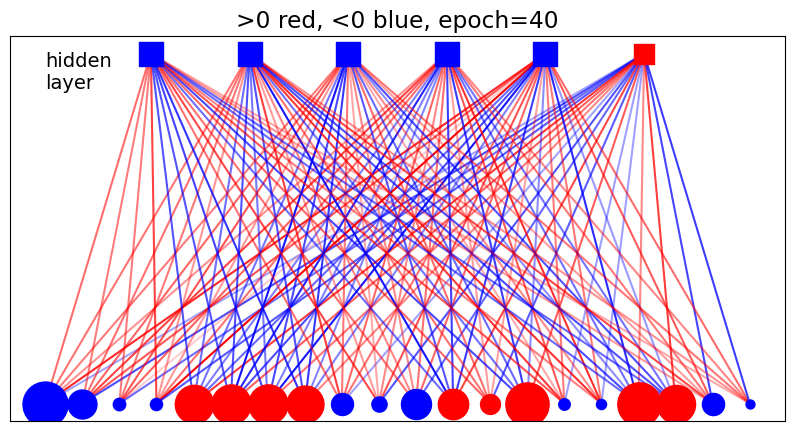

l_rate =  0.7142857142857149


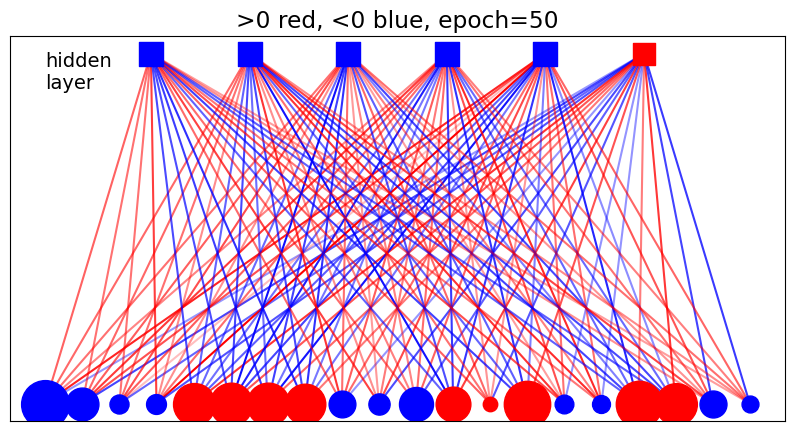

l_rate =  0.6666666666666671


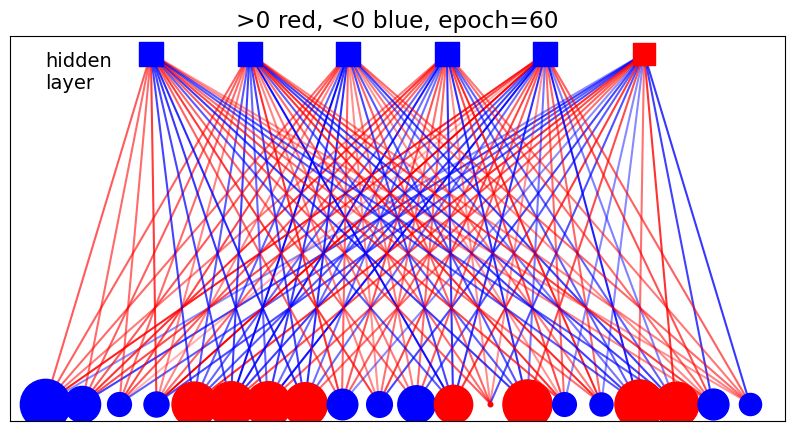

l_rate =  0.6250000000000006


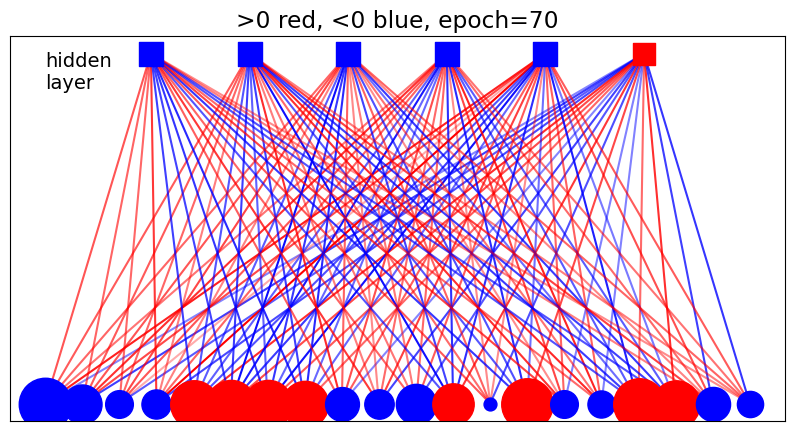

l_rate =  0.5882352941176475


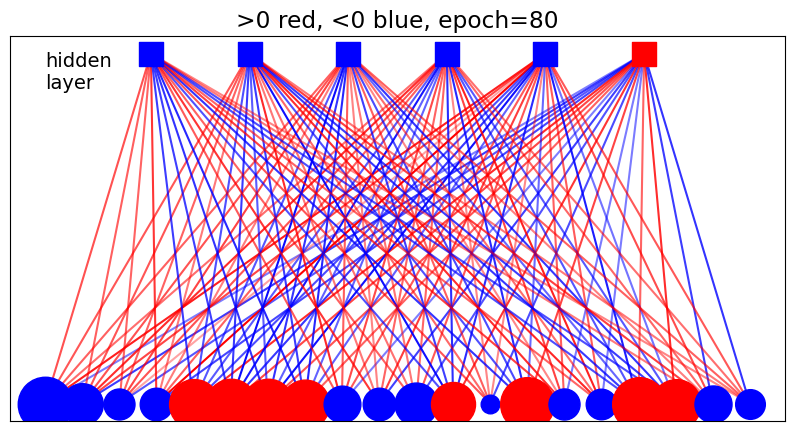

l_rate =  0.555555555555556


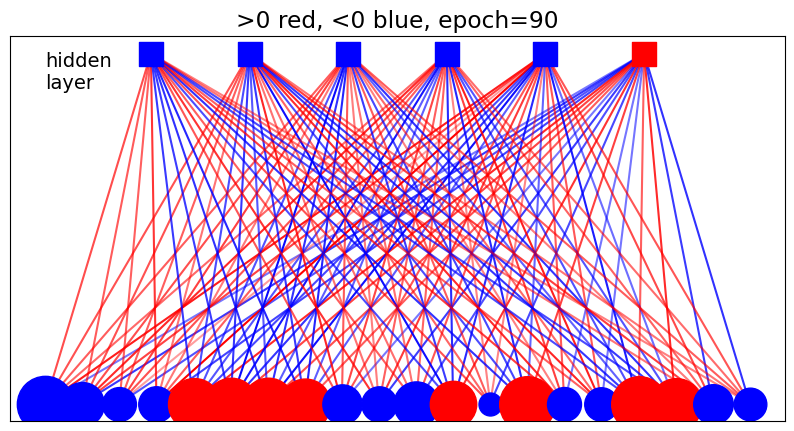

l_rate =  0.5263157894736847


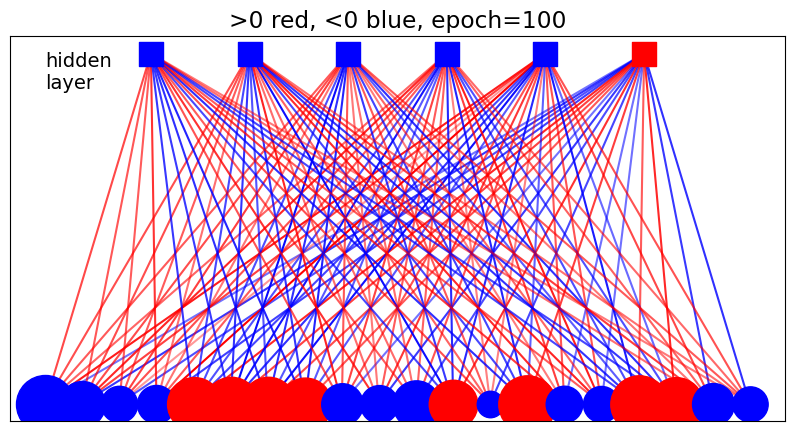

l_rate =  0.5000000000000009


In [6]:
# random seed for reproducibility
np.random.seed(12345)

plotgraph(0)

# learning rate
l_rate = 1.0

# initialize Adam 
beta1=0.9
beta2=0.999
epsilon=1e-8
m_dw, v_dw = 0, 0
m_db, v_db = 0, 0
m_da, v_da = 0, 0
t=1

# minibatch
mini, m = 500, 0
steps=5
# train model
print('===================================================')
for epoch in range(100):
    # aggregate normalization of batch statistics and learning rate
    l_rate_m = l_rate / mini
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

        # positive CD phase: generating h 
        h = activate(v[k],w,b,GAP)
        hf=h
        for i in range(steps):
            vf = activate(hf,w.T,a,GAP)
            # one more positive CD phase: generating fantasy h from fantasy vf 
            hf = activate(vf,w,b,GAP)
        v_data  += v[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v[k].T,h)
        vh_model+= np.outer(vf.T,hf)
    
        m += 1
        # minibatch
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with a Adam optimizer
            dw = l_rate_m*(vh_data - vh_model)
            da = l_rate_m*(v_data - v_model)
            db = l_rate_m*(h_data - h_model)
            
            ##********update***********##
            m_dw = beta1*m_dw + (1-beta1)*(vh_data - vh_model)
            m_db = beta1*m_db + (1-beta1)*(h_data - h_model)
            m_da = beta1*m_da + (1-beta1)*(v_data - v_model)

            ## rms beta 2
            v_dw = beta2*v_dw + (1-beta2)*((vh_data - vh_model)**2)
            v_db = beta2*v_db + (1-beta2)*((h_data - h_model)**2)
            v_da = beta2*v_da + (1-beta2)*((v_data - v_model)**2)

            ## bias correction
            m_dw_corr = m_dw/(1-beta1**t)
            m_db_corr = m_db/(1-beta1**t)
            m_da_corr = m_da/(1-beta1**t)

            v_dw_corr = v_dw/(1-beta2**t)
            v_db_corr = v_db/(1-beta2**t)
            v_da_corr = v_da/(1-beta2**t)
            
            if epoch<=1 and k<=mini:
                print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                print('dw =',dw)
                print('da =',da)
                print('db =',db)
                
            ## update weights and biases
            w = w - l_rate_m*(m_dw_corr/(np.sqrt(v_dw_corr)+epsilon))
            b = b - l_rate_m*(m_db_corr/(np.sqrt(v_db_corr)+epsilon))
            a = a - l_rate_m*(m_da_corr/(np.sqrt(v_da_corr)+epsilon))
            m=0
            t=t+1 #update the time
    
    # randomize the order of input data
    np.random.shuffle(v)
    # decrease the learning rate (here as a power law)
    l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch%10==9:
        plotgraph(epoch+1)
        print('l_rate = ',l_rate)

In [7]:
print('w0=',w0);print('a0=',a0);print('b0=',b0)
print('w=',w);print('a=',a);print('b=',b)

w0= [[-8.02929500e-02  1.87857033e-01 -2.03740626e-01 -2.17975359e-01
   7.71042577e-01  5.46538733e-01]
 [ 3.64414674e-02  1.10509933e-01  3.01635468e-01  4.88891926e-01
   3.95052168e-01 -5.08419748e-01]
 [ 1.07860593e-01  8.97870182e-02  5.30657642e-01  3.47686193e-01
  -7.85106746e-01 -1.45848643e-01]
 [ 6.54645586e-01 -1.72021203e-01 -2.11704013e-01  1.87088914e-01
   1.27434065e+00 -4.00558390e-01]
 [-2.26352263e-01  4.86843697e-02  1.18694804e-01  2.05440307e-01
   3.68807287e-04  5.27085566e-01]
 [-2.79874977e-01 -3.26005239e-01 -9.29681343e-01 -7.29850429e-01
  -3.37616829e-01  2.19707060e-01]
 [-4.96540360e-01  4.70000651e-02 -4.17143902e-01  1.30567343e-01
  -9.25440195e-01 -7.82671864e-02]
 [-6.04820407e-01 -3.80753951e-01 -5.12659443e-01  1.12315611e-01
   1.48257566e-01 -2.95698627e-01]
 [ 1.29940923e-01  5.29412453e-01  2.74078923e-02  9.67535462e-02
  -4.65250272e-03  3.94119531e-01]
 [ 5.20568556e-01 -3.60564048e-01 -6.07609535e-01  8.70151550e-03
   2.97454498e-01 -2.

In [8]:
w1=[w[:,i].reshape(4,5) for i in range(M)]

In [11]:
import seaborn as sns

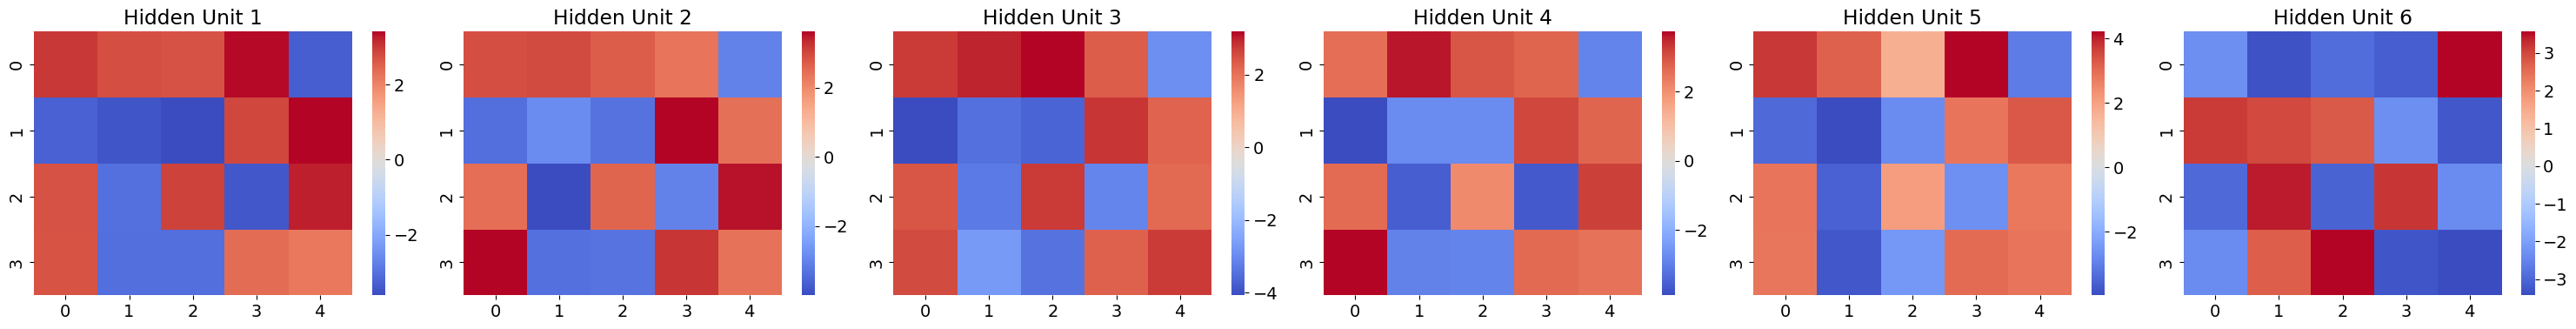

In [12]:
fig, axs = plt.subplots(ncols=6, figsize=(5*6,4))
for i in range(M):
    sns.heatmap(w1[i], cmap='coolwarm', annot=False, ax=axs[i])
    axs[i].set_title(f'Hidden Unit {i+1}')
    plt.tight_layout()
plt.show()

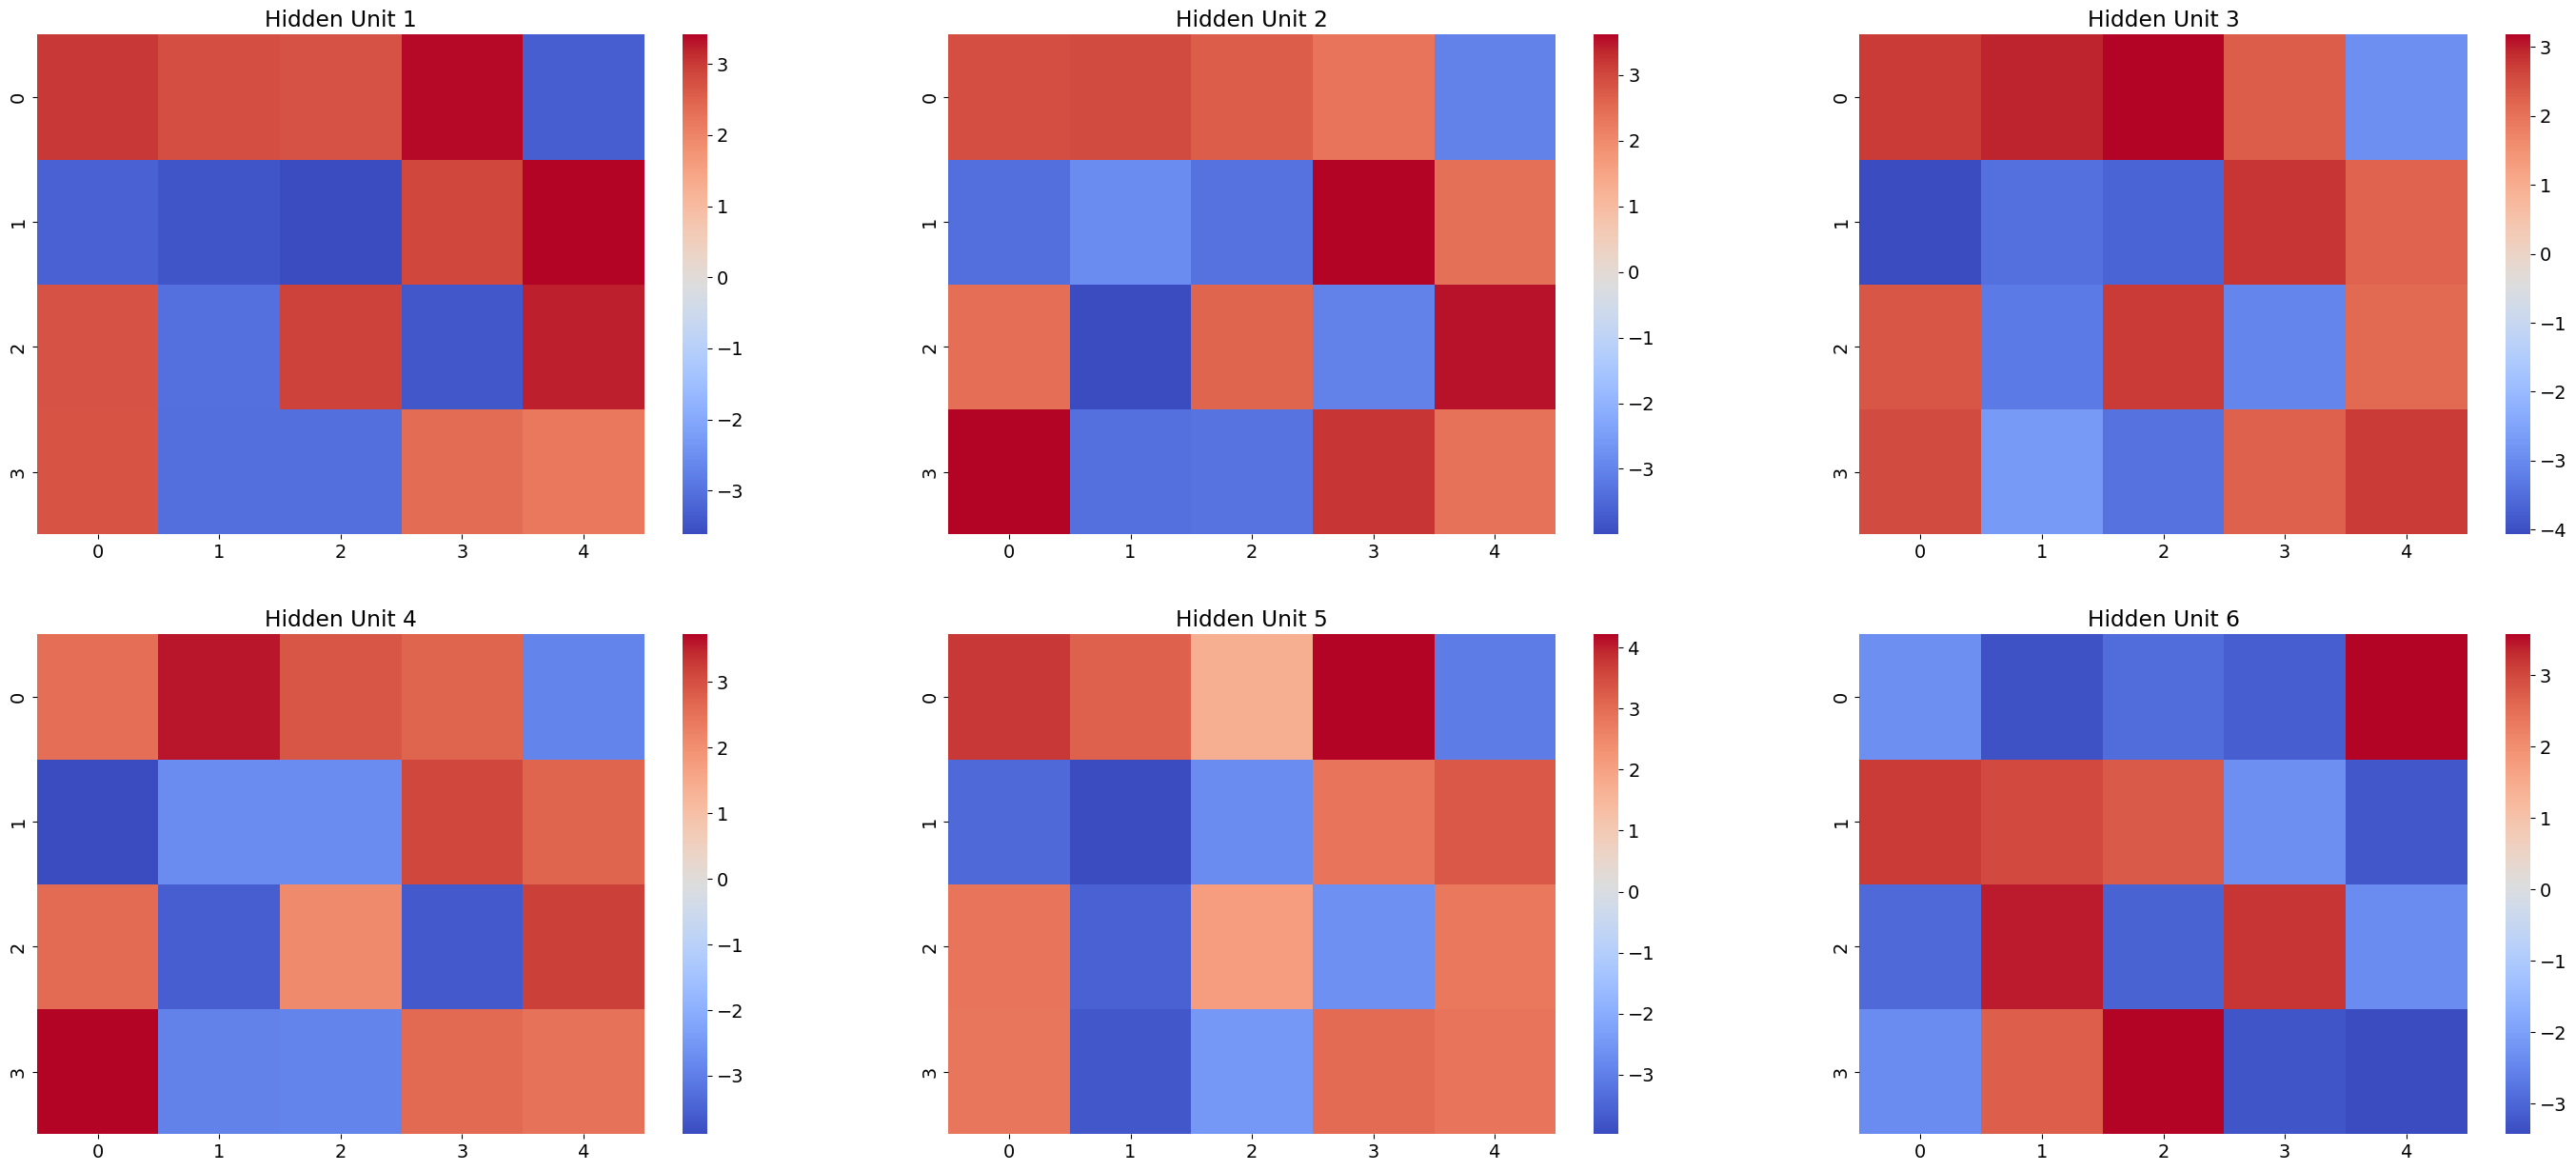

In [13]:
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(35,15))
for i in range(M):
    sns.heatmap(w1[i], cmap='coolwarm', annot=False, ax=axs.flat[i])
    axs.flat[i].set_title(f'Hidden Unit {i+1}')
plt.show()

## Test: noise reduction

In [9]:
from IPython.display import display_html 
import pandas as pd

ampl=40.

# original, non-reshuffled data in v0
v1 = np.zeros_like(v0)
for k in range(N):
    # positive CD phase: generating h 
    h = activate(v0[k],w,b,ampl*GAP)
    # negative CD phase: generating fantasy vf with low T == large GAP
    v1[k] = activate(h,w.T,a,ampl*GAP)
# difference between fantasy and data
diff = (v1 - v0)/2
str0 = fname+'_M'+str(M)+'-mini'+str(mini)
np.savetxt(str0+".fantasy", (v1+1)/2, fmt='%d',delimiter=' ')  
np.savetxt(str0+'.diff', diff, fmt='%d',delimiter=' ')  


def is_one(cell_value):
    color0 = 'background-color: gray; color: white'
    color1 = 'background-color: gold;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

N1=12
df0 = pd.DataFrame(v0[:N1])
df1 = pd.DataFrame(((v1[:N1]-vmin)/(1-vmin)).astype(int))

df0s = df0.style.set_table_attributes("style='display:inline'")
df1s = df1.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
df1s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)
df1s.set_caption('Denoised').set_table_styles(sty)

display_html(df0s._repr_html_()+df1s._repr_html_(), raw=True)

/tmp/ipykernel_4547/3984710747.py:6: RuntimeWarning: overflow encountered in exp
  prob = 1. / (1. + exp(-DE*act))


Original 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 
 
 
 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 2 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 3 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 4 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 5 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 6 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 
 
 7 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 8 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 9 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 10 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 11 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 

 
 Denoised 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 
 
 
 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 1 
 1 
 
 
 1 
 0 
 0 
 1 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 1 
 1 
 1 
 0 
 0 
 1 
 1 
 0 
 0 
 
 
 2 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1 
 1 
 0 
 0 
 
 
 3 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 1 
 1 
 
 
 4 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 1 
 1 
 
 
 5 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 1 
 1 
 
 
 6 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1 
 1 
 0 
 0 
 
 
 7 
 0 
 0 
 1 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 1 
 1 
 1 
 0 
 0 
 1 
 1 
 0 
 0 
 
 
 8 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1 
 1 
 0 
 0 
 
 
 9 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 1 
 1 
 
 
 10 
 1 
 1 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 1 
 1 
 
 
 11 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 1 
 0 
 1 
 0 
 1 
 0 
 1 
 0 
 0 
 1 
 1 
 0 
 0